In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir datasets

In [3]:
!unzip /content/drive/MyDrive/SPARK_AIVLE/dataset.zip -d /content/datasets

Archive:  /content/drive/MyDrive/SPARK_AIVLE/dataset.zip
  inflating: /content/datasets/answer_sample.csv  
  inflating: /content/datasets/test_data.csv  
  inflating: /content/datasets/train_data.csv  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df = pd.read_csv('./datasets/train_data.csv')

df.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [11]:
df_test = pd.read_csv('./datasets/test_data.csv')

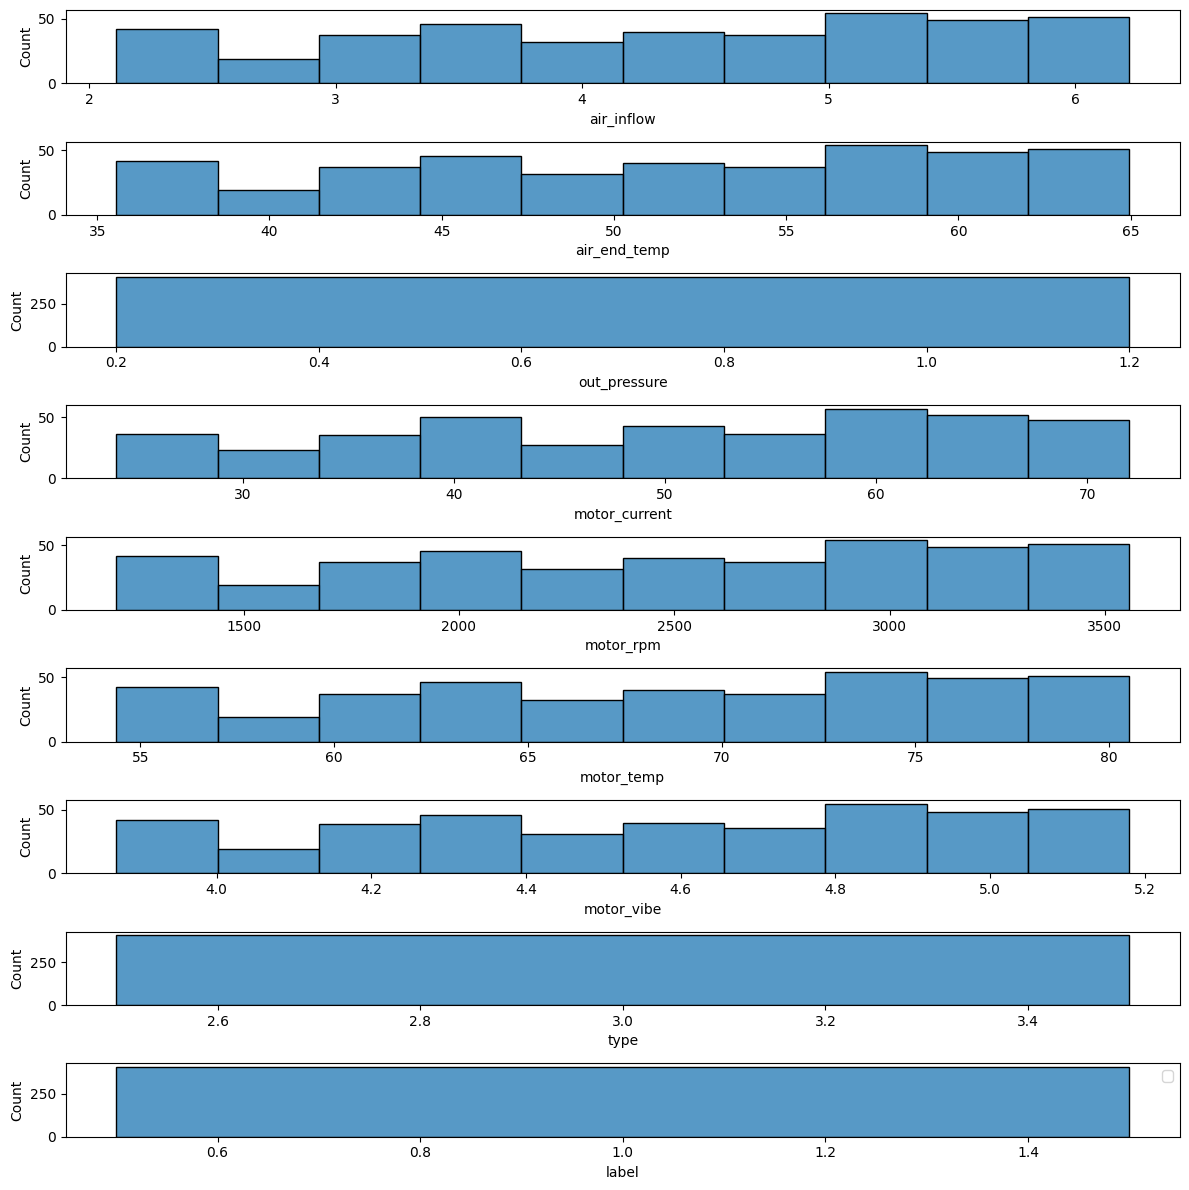

In [ ]:
plt.figure(figsize=(12,12))
for idx, col in enumerate(df.columns, start=1):
  plt.subplot(len(df.columns), 1, idx)
  # sns.histplot(df.loc[(df['type']== 0) | (df['type']== 4) | (df['type']== 5) | (df['type']== 6) | (df['type']== 7), col], label='normal')
  # sns.histplot(df_test.loc[(df_test['type']== 0) | (df_test['type']== 4) | (df_test['type']== 5) | (df_test['type']== 6) | (df_test['type']== 7), col], label='unknown')
  # sns.histplot(df.loc[(df['type']== 1), col],label='normal')
  # sns.histplot(df_test.loc[(df_test['type']== 1), col], label='unknown')
  # sns.histplot(df.loc[(df['type']== 2), col])
  # sns.histplot(df_test.loc[(df_test['type']== 2), col], label='unknown')
  sns.histplot(df.loc[(df['type']== 3), col])
  # sns.histplot(df_test.loc[(df_test['type']== 3), col], label='unknown')

plt.tight_layout()
plt.legend()
plt.show()

In [217]:
cols = df.columns

In [218]:
df.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000


In [219]:
df.isna().sum()

air_inflow       0
air_end_temp     0
out_pressure     0
motor_current    0
motor_rpm        0
motor_temp       0
motor_vibe       0
type             0
dtype: int64

In [220]:
# read & manipulate data
import pandas as pd 
import numpy as np
import tensorflow as tf

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# misc
import random as rn

# load the dataset
df = df

# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = len(df)
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

In [ ]:
# df = df.loc[:, ['air_end_temp', 'out_pressure','motor_rpm',
#                      'motor_temp', 'type', 'log10_air_inflow',
#                     'log10_motor_current', 'log10_motor_vibe']]

In [221]:
# 설비 번호 [0, 4, 5, 6, 7]: 30HP(마력)
# 설비 번호 1: 20HP
# 설비 번호 2: 10HP
# 설비 번호 3: 50HP

mapping = {0:0, 1:1, 2:1, 3:1, 4:0, 5:0, 6:0, 7:0}

df['label'] = df ['type'].map(mapping)

df

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,0
...,...,...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34,7,0
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20,7,0
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70,7,0
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71,7,0


In [222]:
df['label'].value_counts()

0    1422
1    1041
Name: label, dtype: int64

In [223]:
from imblearn.over_sampling import SMOTE, ADASYN

X = df.drop('label', axis=1)
y = df.loc[:,'label']

# SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df = pd.concat([X_resampled, y_resampled], axis=1)

df
# # ADASYN
# adasyn = ADASYN()
# X_resampled, y_resampled = adasyn.fit_resample(X, y)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.590000,41.000000,0.7,20.530000,1680.000000,58.670000,2.930000,0,0
1,2.970000,59.280000,0.7,38.400000,3142.000000,74.910000,3.750000,0,0
2,1.910000,45.290000,0.7,24.730000,2023.000000,62.480000,3.120000,0,0
3,2.370000,51.330000,0.7,30.630000,2506.000000,67.840000,3.390000,0,0
4,1.900000,45.210000,0.7,24.650000,2017.000000,62.410000,3.120000,0,0
...,...,...,...,...,...,...,...,...,...
2839,4.741199,54.336794,0.7,55.000000,2706.999477,71.078394,4.702800,3,1
2840,1.447695,48.946204,0.7,21.320034,2475.542394,65.503119,3.177695,1,1
2841,1.390000,47.799352,0.7,20.525611,2383.748175,64.487482,3.121870,1,1
2842,4.730000,54.283816,0.7,55.000000,2702.705283,71.027053,4.700000,3,1


In [224]:
df['label'].value_counts()

0    1422
1    1422
Name: label, dtype: int64

In [225]:
# manual parameter 
RATIO_TO_FRAUD = 15

# splitting by class
fraud = df[df.label == 1]
clean = df[df.label == 0]

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([fraud, clean])
column_names = list(visualisation_initial.drop('label', axis=1).columns)

# isolate features from labels 
features, labels = visualisation_initial.drop('label', axis=1).values, \
                   visualisation_initial.type.values

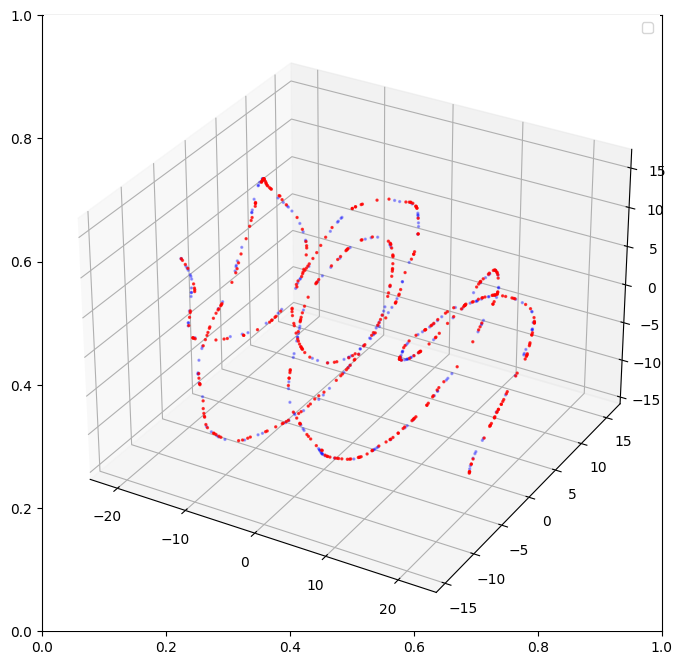

In [ ]:
# from sklearn.manifold import TSNE
# from mpl_toolkits.mplot3d import Axes3D

# def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
#     if dimensions not in (2, 3):
#         raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

#     # t-SNE dimensionality reduction
#     features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
#     # initialising the plot
#     fig, ax = plt.subplots(figsize=(8,8))
    
#     # counting dimensions
#     if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

#     # plotting data
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==0)]),
#         marker='o',
#         color='r',
#         s=2,
#         alpha=0.7,
#         #label='Fraud'
#     )
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==4)]),
#         marker='o',
#         color='g',
#         s=2,
#         alpha=0.3,
#        # label='Clean'
#     )
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==5)]),
#         marker='o',
#         color='b',
#         s=2,
#         alpha=0.3,
#         #label='Clean'
#     )
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==6)]),
#         marker='o',
#         color='gray',
#         s=2,
#         alpha=0.3,
#      #   label='Clean'
#     )
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==7)]),
#         marker='o',
#         color='black',
#         s=2,
#         alpha=0.3,
#       #  label='Clean'
#     )

#     # storing it to be displayed later
#     plt.legend(loc='best')
#     plt.savefig(save_as);
#     plt.show;

# tsne_scatter(features, labels, dimensions=2, save_as='tsne_initial_2d.png')

In [226]:
clean.shape, fraud.shape

((1422, 9), (1422, 9))

In [227]:
X_train = clean.drop('label', axis=1)

fraud = clean.iloc[-50:].append(fraud).sample(frac=1)

<ipython-input-227-11c4cb936fe0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fraud = clean.iloc[-50:].append(fraud).sample(frac=1)


In [228]:
X_train.shape, fraud.shape

((1422, 8), (1472, 9))

In [229]:
from sklearn.model_selection import train_test_split

X_test, y_test = fraud.drop('label', axis=1).values, fraud.label.values

In [230]:
X_train.shape, X_test.shape

((1422, 8), (1472, 8))

In [231]:
from sklearn.preprocessing import Normalizer, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', RobustScaler())])

In [232]:
# get normalization parameters by fitting to the training data
pipeline.fit(X_train);

In [233]:
# # transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(X_train)
# X_validate_transformed = pipeline.transform(X_val)

In [234]:
tf.keras.backend.clear_session()

# data dimensions // hyperparameters 
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 16
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    #tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(3, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    #tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [235]:
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

In [236]:
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    #callbacks=[early_stop],
    #validation_data=(X_validate_transformed, X_validate_transformed)
);

Epoch 1/100
89/89 [==============================] - 2s 3ms/step - loss: 0.2863 - acc: 0.2229
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.1397 - acc: 0.2743
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.1187 - acc: 0.3073
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.1040 - acc: 0.3629
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0913 - acc: 0.4156
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0835 - acc: 0.4353
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0789 - acc: 0.4451
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0759 - acc: 0.4606
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 0.0736 - acc: 0.4775
Epoch 10/100
89/89 [==============================] - 0s 3ms/step - loss: 0.0712 - acc: 0.4733
Epoch 11/100
89/89 [==============================] - 0s 2m

In [237]:
# transform the test set with the pipeline fitted to the training set
#X_test = fraud.drop('label', axis=1)
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

 1/46 [..............................] - ETA: 4s

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


46/46 [==============================] - 0s 2ms/step


In [238]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [239]:
clean.shape, X_test.shape

((1422, 9), (1472, 8))

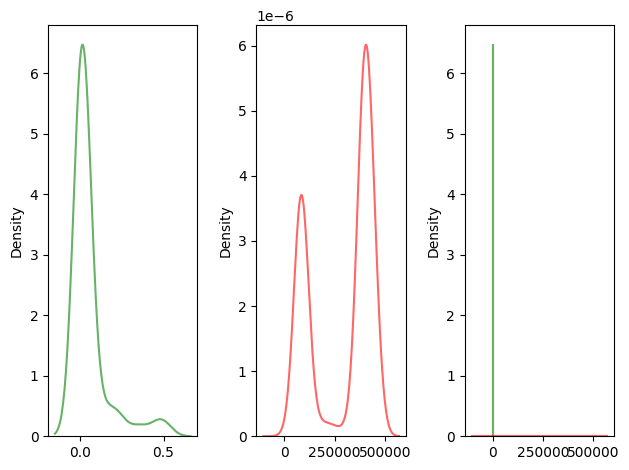

In [240]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

plt.subplot(1,3,1)
sns.kdeplot(clean, label='clean', alpha=.6, color='green')
plt.subplot(1,3,2)
sns.kdeplot(fraud, label='fraud', alpha=.6, color='red')
plt.subplot(1,3,3)
sns.kdeplot(clean, label='clean', alpha=.6, color='green')
sns.kdeplot(fraud, label='fraud', alpha=.6, color='red')

plt.tight_layout()
plt.show()

In [241]:
clean.max(), fraud.min()

(0.5090662825682306, 3307.601667889678)

## VAE 버젼

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
# 모델 구성
input_dim = 8
hidden_dim = 4
latent_dim = 2

In [ ]:
tf.keras.backend.clear_session()

inputs = Input(shape=(input_dim,), name='encoder_input')
x = Dense(hidden_dim, activation='elu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# VAE sampling
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# 인코더
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# 디코더
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(hidden_dim, activation='elu')(latent_inputs)
outputs = Dense(input_dim, activation='elu')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# 엔드투엔드 VAE 모델
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# 손실 함수
reconstruction_loss = binary_crossentropy(inputs, outputs)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')

In [ ]:
# 모델 학습
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   restore_best_weights=True,
                   min_delta=0,
                   verbose=1)
vae.fit(X_train_transformed, validation_split=.2, callbacks=[es], epochs=100, batch_size=16)

Epoch 1/100
55/55 [==============================] - 2s 6ms/step - loss: 32.5409 - val_loss: 31.1626
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 30.0945 - val_loss: 28.9519
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: 28.9859 - val_loss: 28.1365
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: 28.6203 - val_loss: 26.2750
Epoch 5/100
55/55 [==============================] - 0s 3ms/step - loss: 26.6519 - val_loss: 26.3107
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 26.0832 - val_loss: 24.7174
Epoch 7/100
55/55 [==============================] - 0s 3ms/step - loss: 25.0155 - val_loss: 25.2684
Epoch 8/100
55/55 [==============================] - 0s 3ms/step - loss: 23.8327 - val_loss: 23.1454
Epoch 9/100
55/55 [==============================] - 0s 3ms/step - loss: 22.7741 - val_loss: 21.8373
Epoch 10/100
55/55 [==============================] - 0s 3ms/step - loss: 22.0287 - val_los

In [155]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = vae.predict(X_test_transformed)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


NameError: ignored

In [ ]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [ ]:
pd.DataFrame(mse).sort_values(by=0, ascending=False)[:2000]

,0
726,18148.228286
725,18116.950899
724,18094.878112
727,18083.985731
723,17899.920869
...,...
896,0.010320
3057,0.010292
3273,0.010290
1326,0.010284


In [ ]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

plt.subplot(1,2,1)
plt.hist(clean, bins=50, density=True, label='clean', alpha=.6, color='green')
plt.subplot(1,2,2)
plt.hist(fraud, bins=50, density=True, label='fraud', alpha=.6, color='red')
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
clean.max(), fraud.min()

(0.2880128728723975, 236.26610944500322)

In [ ]:
autoencoder.save('/content/drive/MyDrive/SPARK_AIVLE/models/model_30.h5')

In [242]:
test_data = pd.read_csv('/content/datasets/test_data.csv')

test_data.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


In [243]:
test_data['label'] = -1

test_data.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,-1
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,-1
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,-1
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,-1
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,-1


In [244]:
cond = (test_data['type'] == 0) | (test_data['type'] == 4) | (test_data['type'] == 5) | (test_data['type'] == 6) | (test_data['type'] == 7)
X_test = test_data.loc[cond, :].drop('label', axis=1)

In [245]:
len(X_test)

4266

In [246]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

134/134 [==============================] - 0s 1ms/step


In [80]:
# plt.subplot(2,1,1)
# sns.histplot(X_train_transformed)
# plt.subplot(2,1,2)
# sns.histplot(X_test_transformed)

In [247]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [248]:
len(mse)

4266

In [249]:
mse.mean()

191.98003653737052

<Axes: >

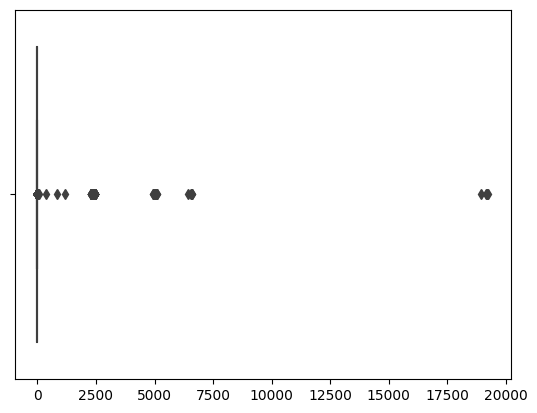

In [250]:
sns.boxplot(x = mse)

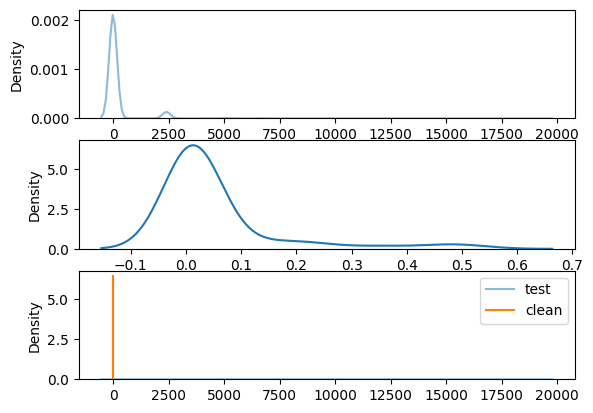

In [251]:
plt.subplot(3,1,1)
sns.kdeplot(mse, label='test', alpha=0.5)
plt.subplot(3,1,2)
sns.kdeplot(clean, label='clean')
plt.subplot(3,1,3)
sns.kdeplot(mse, label='test', alpha=0.5)
sns.kdeplot(clean, label='clean')
plt.legend()
plt.show()

In [252]:
pd.DataFrame(mse).sort_values(by=0, ascending=False)

,0
726,19245.463561
725,19195.488669
724,19178.107476
727,19147.493263
723,18912.555641
...,...
2600,0.000096
1861,0.000093
2446,0.000050
2558,0.000050


In [253]:
threshold = clean.mean() + clean.std() * 3
threshold

0.3871241801020252

In [254]:
test_data.loc[cond, 'label'] = np.where(mse > 1, 1, 0)

In [91]:
!mkdir /content/drive/MyDrive/SPARK_AIVLE/test_data_dim_2_train_all/

mkdir: cannot create directory ‘/content/drive/MyDrive/SPARK_AIVLE/test_data_dim_2_train_all/’: File exists


In [255]:
test_data.to_csv('/content/drive/MyDrive/SPARK_AIVLE/test_data_dim_2_train_all/test_30.csv', index=False)

In [212]:
semi_df = test_data.loc[test_data['label'] == 0]

semi_df.shape

(3982, 9)

In [213]:
df = pd.concat((df, semi_df), axis=0)

In [214]:
df.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,0
